In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [196]:
df=pd.read_csv("bigmart_data.csv")

In [197]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [199]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [200]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())

In [201]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [202]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

In [203]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [205]:
from sklearn.preprocessing import  LabelEncoder

label_quality = LabelEncoder()
df['Item_Type'] = label_quality.fit_transform(df['Item_Type'])
df['Outlet_Type'] = label_quality.fit_transform(df['Outlet_Type'])
df['Outlet_Identifier'] = label_quality.fit_transform(df['Outlet_Identifier'])

In [206]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,4,249.8092,9,1999,Medium,Tier 1,1,3735.1380
1,DRC01,5.92,Regular,0.019278,14,48.2692,3,2009,Medium,Tier 3,2,443.4228
2,FDN15,17.50,Low Fat,0.016760,10,141.6180,9,1999,Medium,Tier 1,1,2097.2700
3,FDX07,19.20,Regular,0.000000,6,182.0950,0,1998,Medium,Tier 3,0,732.3800
4,NCD19,8.93,Low Fat,0.000000,9,53.8614,1,1987,High,Tier 3,1,994.7052


In [207]:
def encode(city):
    if city=="Tier 1":
        label=0
    elif city=="Tier 2":
        label=1
    else:
        label=2
    return label

df["encode_city"]=df["Outlet_Location_Type"].apply(encode)


In [208]:
def encode(outlet_size):
    if outlet_size=="Low":
        label=0
    elif outlet_size=="Medium":
        label=1
    else:
        label=2
    return label

df["encode_outlet_size"]=df["Outlet_Size"].apply(encode)


In [209]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,encode_city,encode_outlet_size
0,FDA15,9.30,Low Fat,0.016047,4,249.8092,9,1999,Medium,Tier 1,1,3735.1380,0,1
1,DRC01,5.92,Regular,0.019278,14,48.2692,3,2009,Medium,Tier 3,2,443.4228,2,1
2,FDN15,17.50,Low Fat,0.016760,10,141.6180,9,1999,Medium,Tier 1,1,2097.2700,0,1
3,FDX07,19.20,Regular,0.000000,6,182.0950,0,1998,Medium,Tier 3,0,732.3800,2,1
4,NCD19,8.93,Low Fat,0.000000,9,53.8614,1,1987,High,Tier 3,1,994.7052,2,2


In [210]:

#as per this we are dropping Outlet_Location_Type and Outlet_Size.

C:\Users\Preeti kumari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


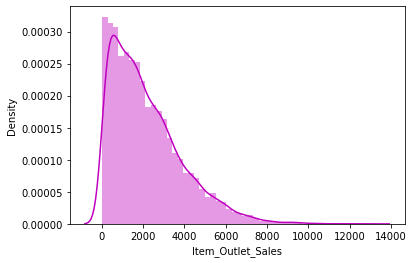

In [211]:
sns.distplot(df.Item_Outlet_Sales, color = "m")
plt.show()

C:\Users\Preeti kumari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


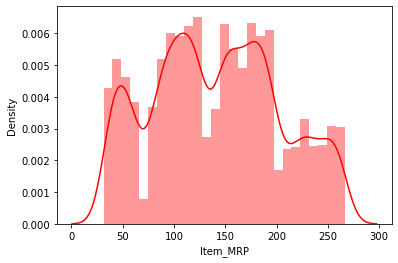

In [214]:
sns.distplot(df.Item_MRP, color = "b");

In [215]:
 df['Item_Fat_Content'].replace(['reg'],'Regular',inplace=True)
 


In [216]:
df['Item_Fat_Content'].replace(['LF',"low fat"],'Low Fat',inplace=True)

In [217]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

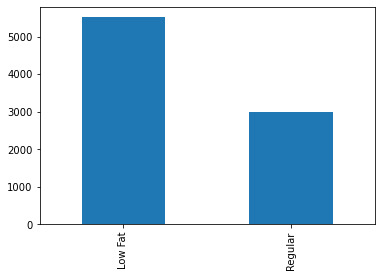

In [218]:
df.Item_Fat_Content.value_counts().plot(kind = "bar")

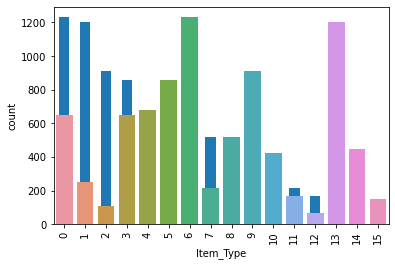

In [219]:
df.Item_Type.value_counts().plot(kind = "bar")
sns.countplot(x = "Item_Type", data = df)
plt.xticks(rotation = 90)
plt.show()

In [220]:
df.skew()
#item outlet sales is postivly skewed

Item_Weight                  0.121845
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
encode_city                 -0.209093
encode_outlet_size           0.453138
dtype: float64

In [221]:
corr_matrix=df.corr()
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
encode_city                  0.089367
Item_Type                    0.017048
Item_Weight                  0.009693
Outlet_Establishment_Year   -0.049135
encode_outlet_size          -0.075154
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

In [222]:
#Dropping columns with less correlation
df_sales=pd.DataFrame(data=df,columns=["Item_Outlet_Sales","Item_MRP","Outlet_Type","Outlet_Identifier","Item_Visibility"])

In [223]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_sales))
threshold=3
df_sales =df_sales[(z < 3).all(axis=1)]

In [224]:
df_sales.skew()
#removed skeness 

Item_Outlet_Sales    0.878267
Item_MRP             0.138990
Outlet_Type          0.956727
Outlet_Identifier   -0.065135
Item_Visibility      0.794272
dtype: float64

In [225]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [226]:
x=df_sales.drop("Item_Outlet_Sales",axis=1)

In [227]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
df_x=sc.transform(x)
df_x=pd.DataFrame(x,columns=x.columns)

In [228]:
y=np.array(df_sales["Item_Outlet_Sales"])

In [229]:
x.shape

(8338, 4)

In [230]:
y.shape

(8338,)

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2_ score corresponding to ",final_r_state,"is",max_r_score)

max r2_ score corresponding to  82 is 0.5222701626972014


In [232]:

print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE is: 1132.890246942645


In [233]:
cross_val_score(lr,x,y,cv=10,scoring="r2").mean()

0.48720981174055156

In [234]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=82)
regressor.fit(x_train,y_train)
y_pred_dt=regressor.predict(x_test)
r2_scr=r2_score(y_test,y_pred_dt)
cross_val_score(regressor, x, y, cv=10,scoring="r2").mean()
r2_scr                   

0.12986860599179584

In [240]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 7)
model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for k= ' , K , 'is:', error)
print("r2_score",r2_score(y_test,pred))
#using knn regressor

RMSE value for k=  20 is: 1124.259952636136
r2_score 0.4742879853635421


In [241]:
cross_val_score(model, x, y, cv=10,scoring="r2").mean()


0.7425086222549565

In [242]:
import joblib
joblib.dump(model,"bigmart.pkl")

['bigmart.pkl']